# Pendeteksi penyakit paru-paru menggunakan Deep-Multi-Layered CNN

#### Dataset

(Google Drive)
> https://drive.google.com/drive/folders/1oAJUw2UChrYMqUwLB8F-4RuX19WoeqsN?usp=sharing

(covid-chestxray-dataset)
> https://github.com/ieee8023/covid-chestxray-dataset


(Actualmed-COVID-chestxray-dataset)
> https://github.com/agchung/Actualmed-COVID-chestxray-dataset

(Kaggle Chest X-Ray Images (Pneumonia))
> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [128]:
#Library CNN
import tensorflow as tf
import glob 
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization, Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.layers.core import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Model
from joblib import dump
le = LabelEncoder()

# library RESNET
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [129]:
# Actuamed Dir Local ALbert
# path = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\Actualmed-COVID-chestxray-dataset-master"

# Actumed Dir Local Jessica
path = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Actualmed-COVID-chestxray-dataset-master-20220416T062843Z-001\Actualmed-COVID-chestxray-dataset-master"

In [130]:
# Kaggle Dir Local Albert
# path2 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\kaggle"

# Kaggle Dir Local Jessica
path2 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\kaggle-20220416T062842Z-001\kaggle"


In [131]:
# Kaggle COVID Dir Local Jessica
path3 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Kaggle Radiography"


In [132]:
## Label for Kaggle Dataset
class_label_kaggle = ["NORMAL","PNEUMONIA"]
le.fit(class_label_kaggle)
class_names_label = {class_label_kaggle:i for i, class_label_kaggle in enumerate(class_label_kaggle)}
class_labelname_kaggle = le.transform(class_label_kaggle)

In [133]:
## Label for Kaggle Radiography Dataset
class_label_kaggle_radiography = ["COVID", "NORMAL"]
le.fit(class_label_kaggle_radiography)
class_names_label_kaggle_radiography = {class_label_kaggle_radiography:i for i, class_label_kaggle_radiography in enumerate(class_label_kaggle_radiography)}
class_labelname_kaggle_radiography = le.transform(class_label_kaggle_radiography)

In [134]:
class_names_label

{'NORMAL': 0, 'PNEUMONIA': 1}

In [135]:
class_names_label_kaggle_radiography

{'COVID': 0, 'NORMAL': 1}

In [136]:
os.listdir(path2)

['NORMAL', 'PNEUMONIA']

In [137]:
os.listdir(path3)

['COVID', 'NORMAL']

In [ ]:
# Making label for kaggle dataset
images1 = []
labels1 = []
print("Loading {}".format(path2))
for folder in os.listdir(path2):
    label = class_names_label[folder]
    print(folder)
    for file in tqdm(os.listdir(os.path.join(path2, folder))):
        img_path = os.path.join(os.path.join(path2, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        images1.append(image)
        labels1.append(label)
images1 = np.array(images1)
labels1 = np.array(labels1)

In [ ]:
# Making label for kaggle radiography dataset
images2 = []
labels2 = []
print("Loading {}".format(path3))
for folder in os.listdir(path3):
    label = class_names_label_kaggle_radiography[folder]
    print(folder)
    for file in tqdm(os.listdir(os.path.join(path3, folder))):
        img_path = os.path.join(os.path.join(path3, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        images2.append(image)
        labels2.append(label)
images2 = np.array(images2)
labels2 = np.array(labels2)

In [140]:
## Adding label for kaggle dataset cause kaggle just do binary classification, meanwhile
## we want to have multiclass classification of 3, so we add 1
for i in range(len(labels1)):
  labels1[i] = labels1[i] + 1

In [141]:
labels1

array([1, 1, 1, ..., 2, 2, 2])

In [142]:
labels2

array([0, 0, 0, ..., 1, 1, 1])

In [143]:
# Actuamed Dataset
source = np.asarray(pd.read_csv(path + '\\metadata.csv'))

In [ ]:
## Dataframe Actuamed
df = pd.DataFrame(source, columns=['patientid',	'offset', 'sex',	'age',	'finding',	
                                   'survival',	'temperature',	'pO2 saturation',	'view',	
                                   'modality',	'imagename','artifacts distortion',	'notes'])
df

In [146]:
## Actuamed
data = []
labels = []
for i in source:
  img = cv2.imread(path +'\\images\\'+ i[10])
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = i[4]
  data.append(img)
  labels.append(label)
data = np.array(data)
label = np.array(labels)

In [147]:
## Cek buat dataset actuamed, kalo datanya bersifat Nan artinya pneumonia
a = ['COVID-19', 'No finding']
for i in range(len(labels)): 
  if labels[i] not in a:
    labels[i] = 'pneumonia'

In [148]:
## Encoder label for actualmed
le.fit(labels)
labels = le.transform(labels)

In [149]:
## Combine the dataset (Actuamed & Python)
new_label = np.concatenate((labels, labels1, labels2), axis=0)
new_data = np.concatenate((data, images1, images2), axis=0)

In [150]:
# dibagi 255 untuk normalisasi
new_data = new_data/255.

In [151]:
new_label

array([2, 2, 1, ..., 1, 1, 1])

In [152]:
new_data.shape

(12070, 128, 128, 3)

In [154]:
new_data = new_data.reshape(len(new_data), 128,128, 3)

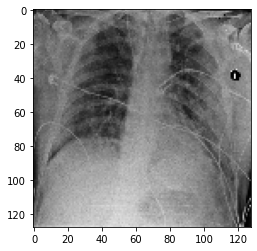

In [155]:
plt.imshow(new_data[15], cmap = 'gray')

In [156]:
data = data.reshape(len(data), 128, 128, 3)

In [157]:
# Check how many data each of the class feature 
# 0 -> covid
# 1 -> normal
# 2 -> pneumonia
print(len(np.where(new_label == 0)[0]))
print(len(np.where(new_label == 1)[0]))
print(len(np.where(new_label == 2)[0]))

3674
4070
4326


In [159]:
# Model VGG-19
model = Sequential()
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [ ]:
model.summary()

In [161]:
new_label = tf.keras.utils.to_categorical(new_label, num_classes=3)

In [162]:
x_train, x_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.2, random_state=1)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
# Print the accuracy of the model
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(model.predict(new_data), axis=-1)))

In [162]:
test = data[1].reshape(1, 128, 128, 3)

In [ ]:
model.predict(test)

In [ ]:
np.argmax(model.predict(test), axis=-1)

In [165]:
## Save deep learning model
model.save("cxr_model2.h5")

In [166]:
## Load the model
# loaded_model = load_model("cxr_model.h5")

## Load the model
# loaded_model = load_model("cxr_model1.h5")

## Load the model
loaded_model = load_model("cxr_model2.h5")

In [ ]:
loaded_model.summary()

In [ ]:
## Test the loaded model again
loaded_model.evaluate(x_test,y_test)

In [33]:
class_label = ["Covid-19", "No Finding", "Pneumonia"]

In [ ]:
## For Predict the Image
%matplotlib inline
from google.colab import file
 
uploaded = file.upload()
 
for fn in uploaded.keys():

  path = fn
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))

img = img.reshape(1, 128, 128, 3)

print(fn)

plt.imshow(img.reshape(128,128,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_label[np.argmax(model.predict(img))])
plt.show()